In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('SuperStoreData.xlsx')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
categories = data.groupby(by="Category").sum()

categories

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\3094702229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categories = data.groupby(by="Category").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


In [4]:
value = categories.Profit
label = categories.Profit.index

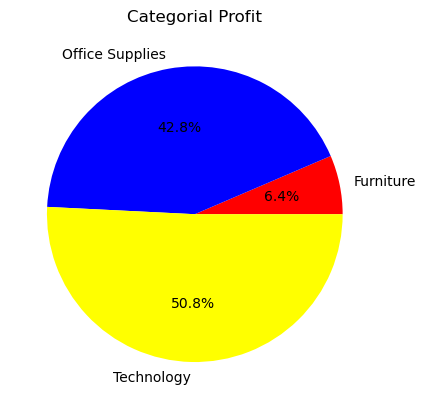

In [5]:
plt.pie(value, labels=label,colors=["red", "blue", "yellow"], autopct="%1.1f%%")

plt.title("Categorial Profit")
plt.show()

In [50]:
subcategories = data.groupby(by="Sub-Category").sum()

subcategories

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\1915698253.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategories = data.groupby(by="Sub-Category").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Sub-Category,,,,,,,
Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357,125443.6823
Appliances,2407754,25250538,107532.1610,1729,77.60,18138.0054,89394.1556
Art,3920109,43329658,27118.7920,3000,59.60,6527.7870,20591.0050
Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633,173190.9697
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560,118352.5523
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663,301858.9367
Copiers,355661,3873477,149528.0300,234,11.00,55617.8249,93910.2051
Envelopes,1207903,13325731,16476.4020,906,20.40,6964.1767,9512.2253
Fasteners,1017287,12506063,3024.2800,914,17.80,949.5182,2074.7618


In [51]:
subcategories = subcategories.sort_values(by='Profit', ascending=False)

labels = subcategories.Profit.index
values = subcategories.Profit

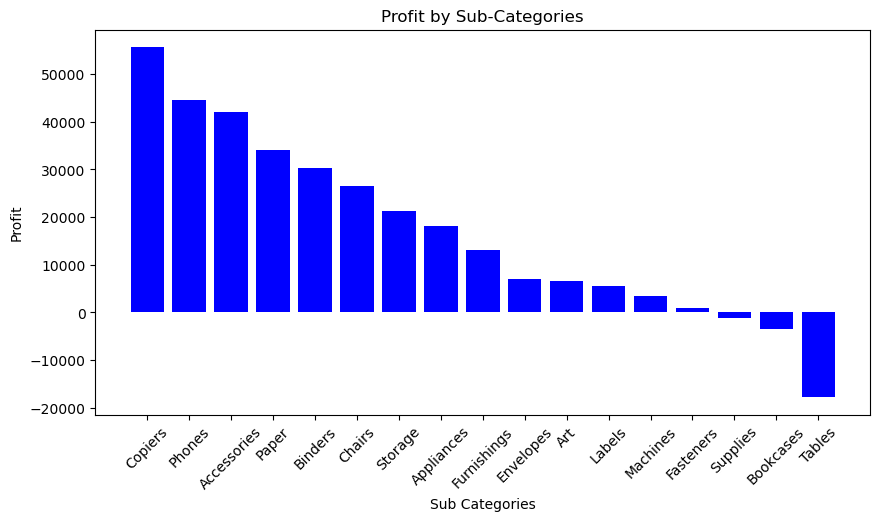

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color="blue")
plt.xlabel("Sub Categories")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.title("Profit by Sub-Categories")
plt.show()

In [9]:
ship_mode = data.groupby(by="Ship Mode").sum()

ship_mode

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\426417472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode = data.groupby(by="Ship Mode").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,
First Class,7498535,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,2784998,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,9601997,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,30059485,327908460,1.358216e+06,22797,955.02,164088.7875


In [10]:
labels = ship_mode.Profit.index
values = ship_mode.Profit

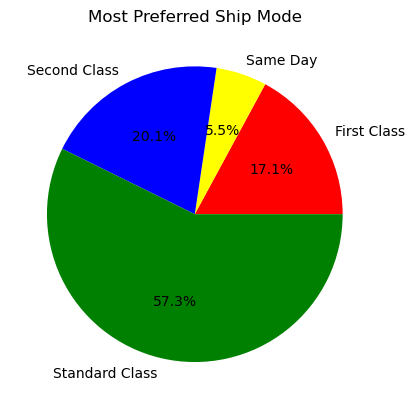

In [11]:
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["red", 'yellow', "blue", 'green'])
plt.title("Most Preferred Ship Mode")
plt.show()

In [12]:
segments = data.groupby(by="Segment").sum()

segments

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\1101146108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segments = data.groupby(by="Segment").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


In [13]:
values = segments.Profit
labels = segments.Profit.index

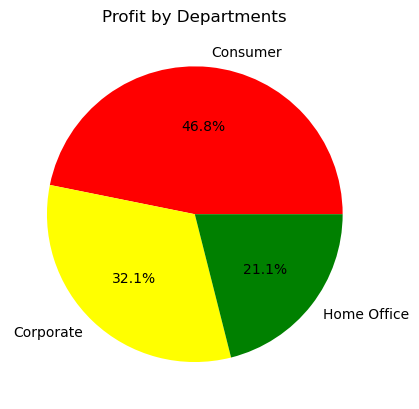

In [14]:
plt.pie(values, labels=labels, colors=['red', 'yellow', 'green'], autopct="%1.1f%%")
plt.title("Profit by Departments")
plt.show()

In [15]:
region = data.groupby(by="Region").sum()

region

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\2293432793.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region = data.groupby(by="Region").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,11685963,151786150,501239.8908,8780,558.34,39706.3625
East,14073919,50171698,678781.2400,10618,414.00,91522.7800
South,8213295,55875052,391721.9050,6209,238.55,46749.4303
West,15971838,293739752,725457.8245,12266,350.20,108418.4489


In [16]:
values = region.Sales
labels = region.Sales.index

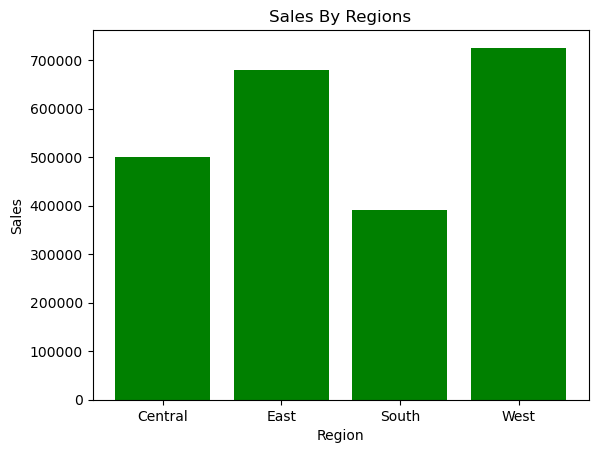

In [20]:
plt.bar(labels, values, color='green')
plt.xlabel('Region')
plt.ylabel("Sales")
plt.title("Sales By Regions")
plt.show()

In [21]:
city = data.groupby(by="City").sum()

city

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\1828035442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city = data.groupby(by="City").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Aberdeen,9261,57401,25.500,3,0.0,6.6300
Abilene,6990,79605,1.392,2,0.8,-3.7584
Akron,97234,930552,2729.986,65,7.5,-186.6356
Albuquerque,67175,1219470,2220.160,65,0.8,634.0881
Alexandria,47898,356864,5519.570,84,0.0,318.6183
...,...,...,...,...,...,...
Woonsocket,19448,11580,195.550,15,0.0,78.6791
Yonkers,74122,160515,7657.666,57,1.0,2767.7557
York,23392,87015,817.978,19,2.1,-102.1692


In [26]:
top10_cities = city.sort_values(by="Sales", ascending=False).head(10)

top10_cities

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
New York City,4450928,9168909,256368.1610,3417,51.40,62036.9837
Los Angeles,3785302,67252887,175851.3410,2879,55.50,30440.7579
Seattle,2199185,41989758,119540.7420,1590,27.80,29156.0967
San Francisco,2462471,47998395,112669.0920,1935,34.00,17507.3854
Philadelphia,2531454,10275302,109077.0130,1981,175.50,-13837.7674
Houston,2017125,29052387,64504.7604,1466,143.14,-10153.5485
Chicago,1643465,19037248,48539.5410,1132,120.50,-6654.5688
San Diego,827518,15650880,47521.0290,670,13.60,6377.1960
Jacksonville,599775,3843200,44713.1830,429,35.85,-2323.8350


In [27]:
values = top10_cities.Sales
labels = top10_cities.Sales.index

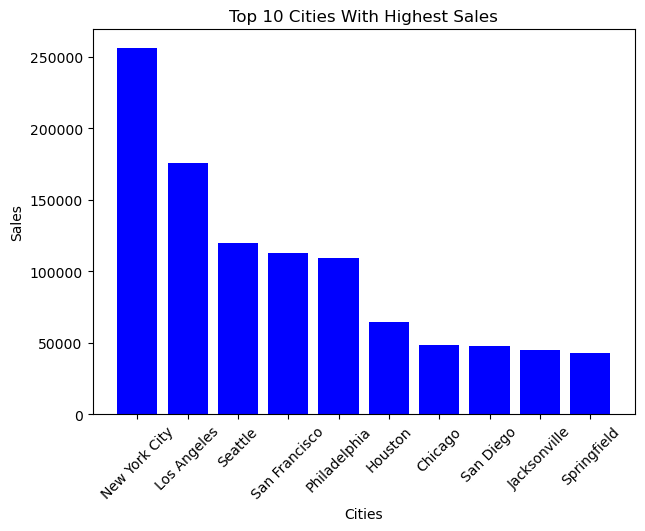

In [34]:
plt.figure(figsize=(7, 5))
plt.bar(labels, values, color='blue')
plt.xlabel('Cities')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.title("Top 10 Cities With Highest Sales")
plt.show()

In [36]:
bottom10_cities = city.sort_values(by="Sales").head(10)

bottom10_cities

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Abilene,6990,79605,1.392,2,0.8,-3.7584
Elyria,8716,44035,1.824,1,0.7,-1.3984
Jupiter,5441,33458,2.064,1,0.2,0.1548
Pensacola,4879,32503,2.214,3,0.7,-1.4760
Ormond Beach,2121,32174,2.808,3,0.7,-1.9656
San Luis Obispo,9702,93405,3.620,2,0.0,1.1946
Springdale,9761,72762,4.300,2,0.0,1.4190
Layton,340,84041,4.960,4,0.0,2.3312
Keller,1885,76248,6.000,2,0.2,2.1000


In [37]:
bottom10_cities

values = bottom10_cities.Sales
labels = bottom10_cities.Sales.index

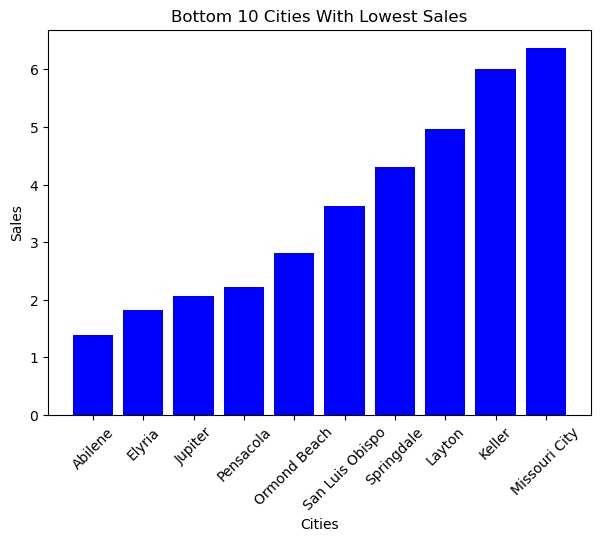

In [38]:
plt.figure(figsize=(7, 5))
plt.bar(labels, values, color='blue')
plt.xlabel('Cities')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.title("Bottom 10 Cities With Lowest Sales")
plt.show()

In [39]:
country = data.groupby(by="Country").sum()

country

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\1795923175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = data.groupby(by="Country").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Country,,,,,,
United States,49945015,551572652,2.297201e+06,37873,1561.09,286397.0217


In [41]:
# Getting the Cost of all Products using Sales and Profit
data['Costs'] = data['Sales'] - data['Profit']

data.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Costs
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,34.6906
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5.3144
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,816.4368
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,12.7215
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,80.4300


In [43]:
# Discovering the Sub Categories with the Highest Cost put into Production

subcategories = data.groupby(by="Sub-Category").sum()

subcategories

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\3420641983.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategories = data.groupby(by="Sub-Category").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Sub-Category,,,,,,,
Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357,125443.6823
Appliances,2407754,25250538,107532.1610,1729,77.60,18138.0054,89394.1556
Art,3920109,43329658,27118.7920,3000,59.60,6527.7870,20591.0050
Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633,173190.9697
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560,118352.5523
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663,301858.9367
Copiers,355661,3873477,149528.0300,234,11.00,55617.8249,93910.2051
Envelopes,1207903,13325731,16476.4020,906,20.40,6964.1767,9512.2253
Fasteners,1017287,12506063,3024.2800,914,17.80,949.5182,2074.7618


In [46]:
subcatcosts = subcategories.sort_values(by="Costs", ascending=False)

subcatcosts

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Sub-Category,,,,,,,
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663,301858.9367
Phones,4395985,47897175,330007.0540,3289,137.40,44515.7306,285491.3234
Tables,1572664,18607828,206965.5320,1241,83.35,-17725.4811,224691.0131
Storage,4126649,46248720,223843.6080,3158,63.20,21278.8264,202564.7816
Machines,561428,6364668,189238.6310,440,35.20,3384.7569,185853.8741
Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633,173190.9697
Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357,125443.6823
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560,118352.5523
Copiers,355661,3873477,149528.0300,234,11.00,55617.8249,93910.2051


In [47]:
values = subcatcosts.Costs
labels = subcatcosts.Costs.index

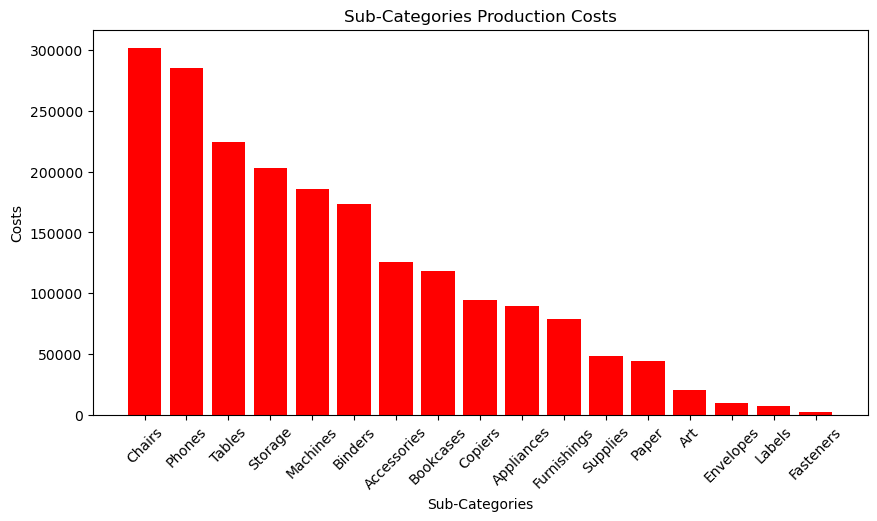

In [49]:
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='red')
plt.xlabel('Sub-Categories')
plt.ylabel("Costs")
plt.xticks(rotation=45)
plt.title("Sub-Categories Production Costs")
plt.show()

In [53]:
shipmode = data.groupby(by="Ship Mode").sum()

shipmode

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\3948301230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shipmode = data.groupby(by="Ship Mode").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Ship Mode,,,,,,,
First Class,7498535,84229511,3.514284e+05,5693,253.17,48969.8399,3.024586e+05
Same Day,2784998,31242093,1.283631e+05,1960,82.75,15891.7589,1.124714e+05
Second Class,9601997,108192588,4.591936e+05,7423,270.15,57446.6354,4.017469e+05
Standard Class,30059485,327908460,1.358216e+06,22797,955.02,164088.7875,1.194127e+06


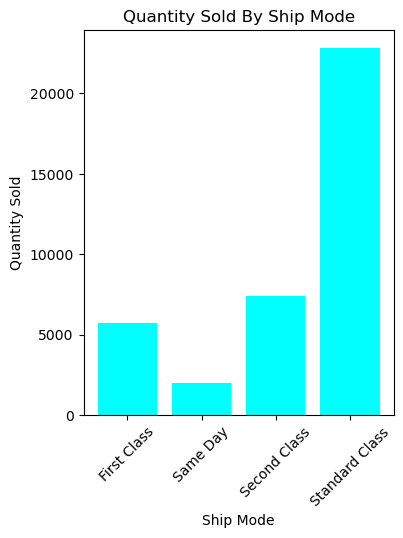

In [56]:
# Quantity Sold By 'Ship Mode'

values = shipmode.Quantity
labels = shipmode.Quantity.index

plt.figure(figsize=(4, 5))
plt.bar(labels, values, color='cyan')
plt.xlabel('Ship Mode')
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.title("Quantity Sold By Ship Mode")
plt.show()

In [63]:
segment = data.groupby(by="Segment").sum()

segment

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\2789799051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment = data.groupby(by="Segment").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Segment,,,,,,,
Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092,1.027282e+06
Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340,6.141672e+05
Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785,3.693545e+05


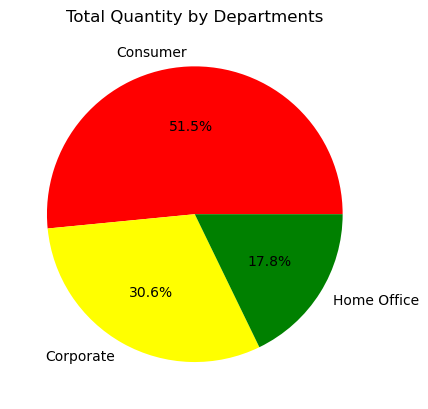

In [64]:
values = segment.Quantity
labels = segment.Quantity.index

plt.pie(values, labels=labels, colors=['red', 'yellow', 'green'], autopct="%1.1f%%")
plt.title("Total Quantity by Departments")
plt.show()

In [71]:
# Top 10 Customers who contributed to the Most Sales

customer = data.groupby(by="Customer Name").sum()

top_sales_customer = customer.sort_values(by="Sales", ascending=False).head(10)
top_sales_customer

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_4008\1351760626.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer = data.groupby(by="Customer Name").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Customer Name,,,,,,,
Sean Miller,77545,482091,25043.050,50,3.7,-1980.7393,27023.7893
Tamara Chand,75386,586036,19052.218,42,1.4,8981.3239,10070.8941
Raymond Buch,69857,914035,15117.339,71,1.7,6976.0959,8141.2431
Tom Ashbrook,48932,375032,14595.620,36,0.8,4703.7883,9891.8317
Adrian Barton,130088,1359311,14473.571,73,4.8,5444.8055,9028.7655
Ken Lonsdale,90197,1779734,14175.229,113,5.8,806.8550,13368.3740
Sanjit Chand,73852,1671032,14142.334,87,1.4,5757.4119,8384.9221
Hunter Lopez,21159,646404,12873.298,50,0.2,5622.4292,7250.8688
Sanjit Engle,96544,1223448,12209.438,78,2.1,2650.6769,9558.7611


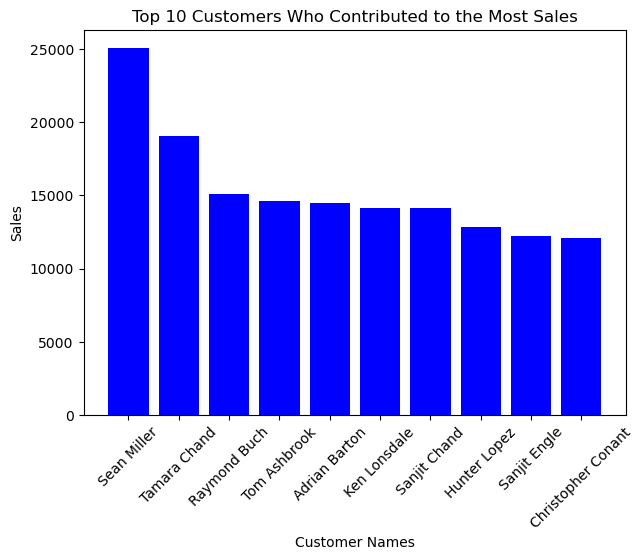

In [75]:
values = top_sales_customer.Sales
labels = top_sales_customer.Sales.index

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color='blue')
plt.xlabel('Customer Names')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.title("Top 10 Customers Who Contributed to the Most Sales")
plt.show()

In [76]:
# Top 10 Customers who contributed to the Most Profit

top_profit_customer = customer.sort_values(by="Profit", ascending=False).head(10)

top_profit_customer

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Costs
Customer Name,,,,,,,
Tamara Chand,75386,586036,19052.218,42,1.40,8981.3239,10070.8941
Raymond Buch,69857,914035,15117.339,71,1.70,6976.0959,8141.2431
Sanjit Chand,73852,1671032,14142.334,87,1.40,5757.4119,8384.9221
Hunter Lopez,21159,646404,12873.298,50,0.20,5622.4292,7250.8688
Adrian Barton,130088,1359311,14473.571,73,4.80,5444.8055,9028.7655
Tom Ashbrook,48932,375032,14595.620,36,0.80,4703.7883,9891.8317
Christopher Martinez,37788,520728,8954.020,34,1.20,3899.8904,5054.1296
Keith Dawkins,162319,1481424,8181.256,84,2.45,3038.6254,5142.6306
Andy Reiter,47496,436808,6608.448,33,0.60,2884.6208,3723.8272


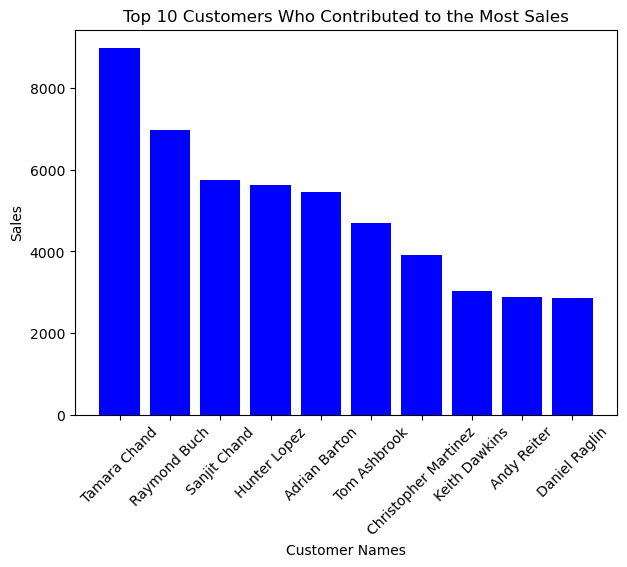

In [78]:
values = top_profit_customer.Profit
labels = top_profit_customer.Profit.index

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color='blue')
plt.xlabel('Customer Names')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.title("Top 10 Customers Who Contributed to the Most Sales")
plt.show()

# Observations: High Sales does not neccessarily leads to High Profit. 

### Sample Case: Customer 'Sean Miller' who Tops the Highest Sales maker but is no where found in the Top 10 Profit makers.